<a href="https://colab.research.google.com/github/AmirMehrabian/Digital_Image_Processing_Using_Python/blob/main/image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Packages**

In [5]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from skimage import data

# **Loading Images**

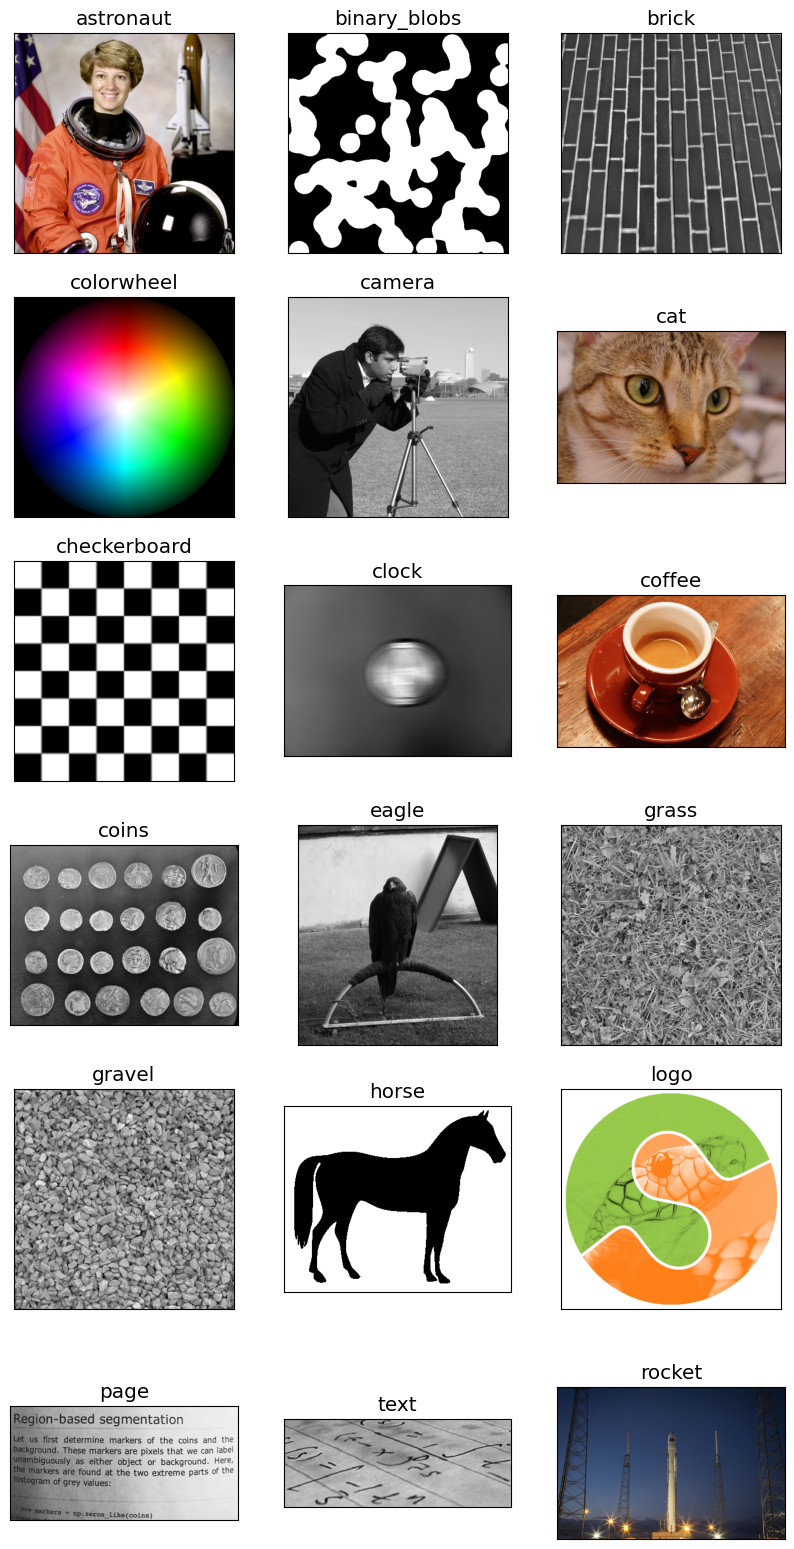

In [6]:
matplotlib.rcParams['font.size'] = 12

images = ('astronaut',
          'binary_blobs',
          'brick',
          'colorwheel',
          'camera',
          'cat',
          'checkerboard',
          'clock',
          'coffee',
          'coins',
          'eagle',
          'grass',
          'gravel',
          'horse',
          'logo',
          'page',
          'text',
          'rocket',
          )

num_images = len(images)
num_col = 3
num_row = num_images//num_col

fig,axs = plt.subplots(num_row, num_col, figsize=(10,20))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

for ii, name in enumerate(images):
    row = ii // num_col
    col = ii % num_col
    caller = getattr(data, name)
    image = caller()
 
    plt.title(name)
    if image.ndim == 2:
        axs[row,col].imshow(image, cmap=plt.cm.gray)
        axs[row,col].set_title(name)
    else:
        axs[row,col].imshow(image)
        axs[row,col].set_title(name)



# **Histogram Streching and Clipping for Contrast Improvment**

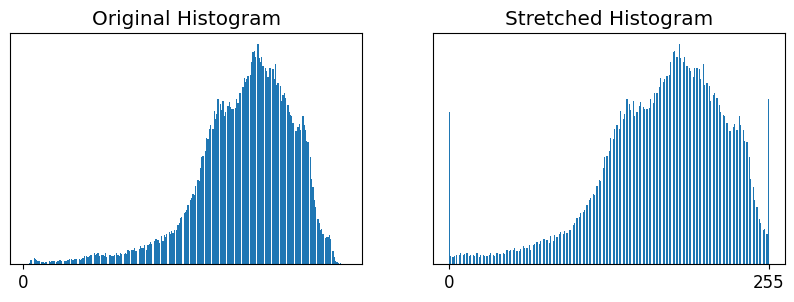

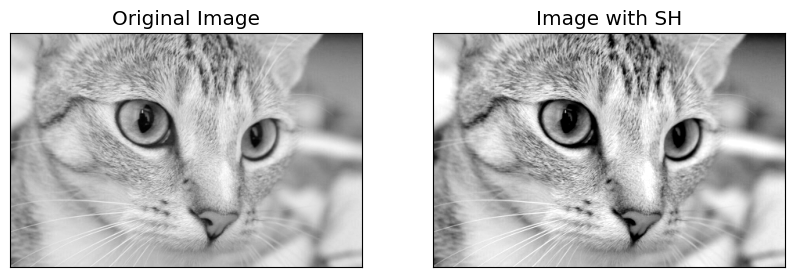

In [7]:
caller = getattr(data, 'cat')

if caller().ndim == 3:
  image = caller()[:,:,0]
elif caller().ndim == 2:
  image = caller()


image_float = image.astype(float)

levels = 2**8
width, height = image.shape

image_array = image_float.ravel()
image_array_sorted = np.sort(image_array)

num_pixels  = image_array.shape[0]

# select the clipping percentile
percent = 1

index_clip = int(percent * num_pixels /100)

f1 = image_array_sorted[index_clip]
f99 = image_array_sorted[-1*index_clip]


stretched_image = (((image_array - f1)/(f99-f1))*(levels-1))

stretched_clipped = np.clip(stretched_image, 0, (levels-1))


fig,axs = plt.subplots(1,2,figsize=(10,3))
plt.setp(plt.gcf().get_axes(), xticks=[0, (levels-1)], yticks=[])

axs[0].hist(image_float.ravel(),levels)
axs[0].set_title("Original Histogram")

axs[1].hist(stretched_clipped, levels)
axs[1].set_title("Stretched Histogram")


fig1,axs1 = plt.subplots(1,2,figsize=(10,5))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

axs1[0].imshow(image,cmap='gray')
axs1[0].set_title("Original Image")

axs1[1].imshow(stretched_clipped.reshape(image.shape),cmap='gray')
axs1[1].set_title("Image with SH");



# **Histogram Equalization**

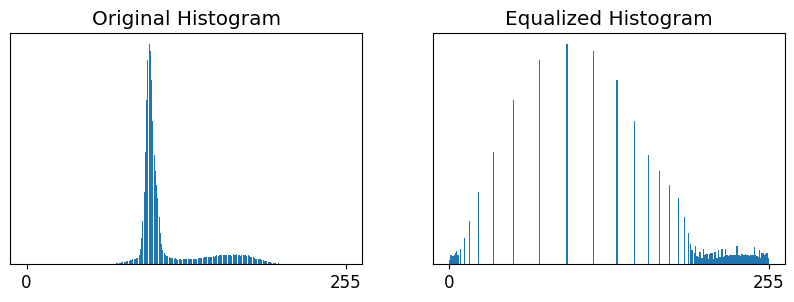

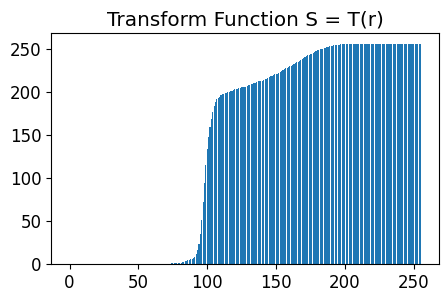

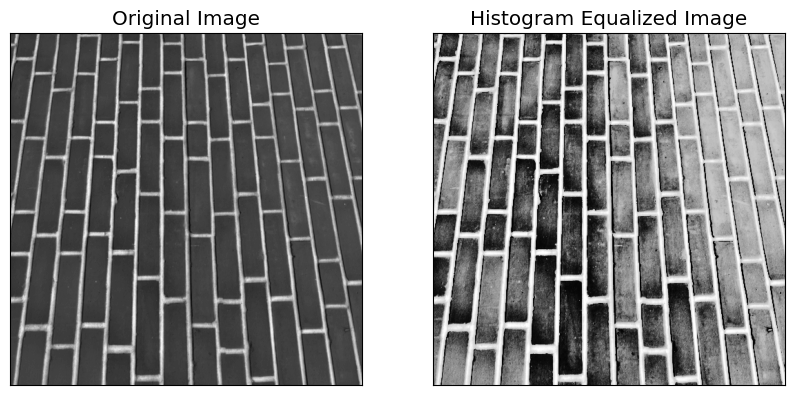

In [8]:
caller = getattr(data, 'brick')

if caller().ndim == 3:
  image = caller()[:,:,0]
elif caller().ndim == 2:
  image = caller()


image_float = image.astype(float)
image_float = image



height, width = image.shape

image_array = image_float.ravel()
image_array_sorted = np.sort(image_array)

num_pixels  = image_array.shape[0]


hist = np.bincount(image_array, minlength = levels)
brightness_levels = np.arange(0,levels)


cdf = np.cumsum(hist.astype(float)/num_pixels)
S_tran = np.round(cdf*(levels - 1))



hist_equalized_vector = np.array([S_tran[int(L)] for L in image_array]);
hist_equalize_image = hist_equalized_vector.reshape(height, width);



fig,axs = plt.subplots(1,2,figsize=(10,3))
plt.setp(plt.gcf().get_axes(), xticks=[0, 255], yticks=[])

axs[0].bar(brightness_levels,hist)
axs[0].set_title("Original Histogram")

axs[1].hist(hist_equalize_image.ravel(), levels);
axs[1].set_title("Equalized Histogram")


fig1, axs1 = plt.subplots(1,1,figsize=(5,3))
axs1.bar(brightness_levels,S_tran)
axs1.set_title("Transform Function S = T(r)")

fig2,axs2 = plt.subplots(1,2,figsize=(10,5))
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

axs2[0].imshow(image,cmap='gray')
axs2[0].set_title("Original Image")

axs2[1].imshow(hist_equalize_image,cmap='gray')
axs2[1].set_title("Histogram Equalized Image");



# **Local Histogram Equalization**

In [11]:
def block_maker(image, x_pixel, y_pixel, half_width = 2, levels = 256):

    h, w = image.shape
     
    x_index = list(range(x_pixel-half_width, x_pixel+half_width+1))
    x_index = list(filter(lambda x: x > -1 and x < w , x_index))
     
    y_index = list(range(y_pixel-half_width, y_pixel+half_width+1))
    y_index = list(filter(lambda x: x > -1 and x < h , y_index))
   
    block0 = image[y_index,:]
    block  = block0[:,x_index]

    block_vec = block.ravel()

    num_pixels  = block_vec.shape[0]
    hist = np.bincount(block_vec, minlength = levels)

    brightness_levels = np.arange(0,levels)

    cdf = np.cumsum(hist.astype(float)/num_pixels)
    S_tran = np.round(cdf*(levels - 1))

    output_pixel = S_tran[int(image[x_pixel,y_pixel])]

    return output_pixel 


In [ ]:
def hist_equlaizer(block,  levels):
  block_vec = block.ravel()
  num_pixels  = block_vec.shape[0]
  hist = np.bincount(block_vec, minlength = levels)

  brightness_levels = np.arange(0,levels)

  cdf = np.cumsum(hist.astype(float)/num_pixels)
  S_tran = np.round(cdf*(levels - 1))



71.0 96


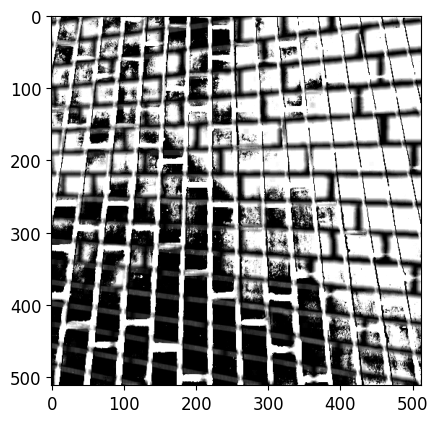

In [14]:
print(block_maker(image, 10, 20, half_width = 2, levels = 256),image[10,20])

height, width = image.shape
LHE_image = np.zeros(image.shape)

for i in range(height):
  for j in range(width):
    new_pixel = block_maker(image, i, j, half_width = 3, levels = 256)
    LHE_image[i, j] = new_pixel

plt.imshow(LHE_image, cmap = 'gray')



In [64]:
print(image[1:10,2:5])

[[143 142 142]
 [146 145 145]
 [147 147 146]
 [150 149 148]
 [152 152 151]
 [156 156 154]
 [160 159 156]
 [161 161 159]
 [166 165 162]]


In [ ]:
np